In [1]:
import pandas as pd

df = pd.read_csv('Data/pacific-heights.csv')
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zipcode
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,Condominium,1900,94109
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,Condominium,1961,94109
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,Condominium,1987,94109
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,Condominium,1924,94109
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,Condominium,2012,94109


In [2]:
df.shape

(439, 13)

In [3]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.840864
bathrooms        0.768179
totalrooms       0.670726
bedrooms         0.606579
zipcode          0.296032
latitude         0.126480
yearbuilt       -0.214365
longitude       -0.309462
Name: lastsoldprice, dtype: float64

In [4]:
df = pd.get_dummies(df, columns=['usecode'])
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,yearbuilt,zipcode,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_MultiFamily2To4,usecode_SingleFamily,usecode_Townhouse
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,1900,94109,1,0,0,0,0,0
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,1961,94109,1,0,0,0,0,0
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,1987,94109,1,0,0,0,0,0
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,1924,94109,1,0,0,0,0,0
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,2012,94109,1,0,0,0,0,0


In [5]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice              1.000000
finishedsqft               0.840864
bathrooms                  0.768179
totalrooms                 0.670726
usecode_SingleFamily       0.638482
bedrooms                   0.606579
zipcode                    0.296032
latitude                   0.126480
usecode_Duplex             0.006292
usecode_MultiFamily2To4   -0.019009
usecode_Townhouse         -0.025467
usecode_Cooperative       -0.025556
yearbuilt                 -0.214365
longitude                 -0.309462
usecode_Condominium       -0.598575
Name: lastsoldprice, dtype: float64

In [6]:
# Filter the dataset down to the most significant columns
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode_Condominium', 'usecode_SingleFamily', 'lastsoldprice']]
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode_Condominium,usecode_SingleFamily,lastsoldprice
0,2.0,2,1463,7,1,0,1950000
1,3.5,3,3291,7,1,0,4200000
2,1.0,1,653,3,1,0,665000
3,2.5,2,2272,6,1,0,2735000
4,1.0,1,837,3,1,0,1050000


In [7]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice           1.000000
finishedsqft            0.840864
bathrooms               0.768179
totalrooms              0.670726
usecode_SingleFamily    0.638482
bedrooms                0.606579
usecode_Condominium    -0.598575
Name: lastsoldprice, dtype: float64

<AxesSubplot:xlabel='finishedsqft', ylabel='lastsoldprice'>

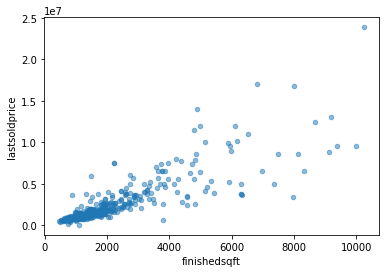

In [8]:
%matplotlib inline

df.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)

In [9]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

x = df.drop('lastsoldprice', axis=1)
y = df['lastsoldprice']

scaler = StandardScaler()
x = scaler.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5
0,-0.285556,-0.399122,-0.403081,0.105818,0.620369,-0.564197
1,0.698425,0.140000,0.681683,0.105818,0.620369,-0.564197
2,-0.941543,-0.938244,-0.883748,-0.909570,0.620369,-0.564197
3,0.042437,-0.399122,0.076993,-0.148029,0.620369,-0.564197
4,-0.941543,-0.938244,-0.774559,-0.909570,0.620369,-0.564197


In [10]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [11]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=6, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2000, batch_size=20)

Epoch 1/2000
18/18 [==============================] - 7s 17ms/step - loss: 2652397.9737 - mae: 2652397.9737 - val_loss: 2226045.7500 - val_mae: 2226045.7500
Epoch 2/2000
18/18 [==============================] - 0s 1ms/step - loss: 2544680.4211 - mae: 2544680.4211 - val_loss: 2226039.7500 - val_mae: 2226039.7500
Epoch 3/2000
18/18 [==============================] - 0s 1ms/step - loss: 2437429.0000 - mae: 2437429.0000 - val_loss: 2226026.2500 - val_mae: 2226026.2500
Epoch 4/2000
18/18 [==============================] - 0s 1ms/step - loss: 2482408.8684 - mae: 2482408.8684 - val_loss: 2226001.0000 - val_mae: 2226001.0000
Epoch 5/2000
18/18 [==============================] - 0s 1ms/step - loss: 2576456.1842 - mae: 2576456.1842 - val_loss: 2225957.5000 - val_mae: 2225957.5000
Epoch 6/2000
18/18 [==============================] - 0s 1ms/step - loss: 2620804.5658 - mae: 2620804.5658 - val_loss: 2225888.7500 - val_mae: 2225888.7500
Epoch 7/2000
18/18 [==============================] - 0s 1ms/st

18/18 [==============================] - 0s 1ms/step - loss: 2431748.9737 - mae: 2431748.9737 - val_loss: 2080310.8750 - val_mae: 2080310.8750
Epoch 54/2000
18/18 [==============================] - 0s 1ms/step - loss: 2621484.5526 - mae: 2621484.3289 - val_loss: 2072240.0000 - val_mae: 2072240.0000
Epoch 55/2000
18/18 [==============================] - 0s 1ms/step - loss: 2518046.4605 - mae: 2518046.5000 - val_loss: 2063954.0000 - val_mae: 2063954.0000
Epoch 56/2000
18/18 [==============================] - 0s 1ms/step - loss: 2465634.6645 - mae: 2465634.6645 - val_loss: 2055395.2500 - val_mae: 2055395.2500
Epoch 57/2000
18/18 [==============================] - 0s 1ms/step - loss: 2371463.4737 - mae: 2371463.4737 - val_loss: 2046530.3750 - val_mae: 2046530.3750
Epoch 58/2000
18/18 [==============================] - 0s 1ms/step - loss: 2468391.4868 - mae: 2468391.4868 - val_loss: 2037405.1250 - val_mae: 2037405.1250
Epoch 59/2000
18/18 [==============================] - 0s 1ms/step - los

18/18 [==============================] - 0s 1ms/step - loss: 1549894.3553 - mae: 1549894.3553 - val_loss: 1414894.1250 - val_mae: 1414894.1250
Epoch 106/2000
18/18 [==============================] - 0s 1ms/step - loss: 1518376.7138 - mae: 1518376.7138 - val_loss: 1402779.7500 - val_mae: 1402779.7500
Epoch 107/2000
18/18 [==============================] - 0s 1ms/step - loss: 1818472.9605 - mae: 1818472.9605 - val_loss: 1389815.7500 - val_mae: 1389815.7500
Epoch 108/2000
18/18 [==============================] - 0s 1ms/step - loss: 1721132.6711 - mae: 1721132.6711 - val_loss: 1377655.8750 - val_mae: 1377655.8750
Epoch 109/2000
18/18 [==============================] - 0s 1ms/step - loss: 1537693.2138 - mae: 1537693.2138 - val_loss: 1365790.5000 - val_mae: 1365790.5000
Epoch 110/2000
18/18 [==============================] - 0s 1ms/step - loss: 1679145.3684 - mae: 1679145.5066 - val_loss: 1353361.7500 - val_mae: 1353361.7500
Epoch 111/2000
18/18 [==============================] - 0s 1ms/step

18/18 [==============================] - 0s 1ms/step - loss: 1261248.1053 - mae: 1261248.1053 - val_loss: 930559.1875 - val_mae: 930559.1875
Epoch 158/2000
18/18 [==============================] - 0s 1ms/step - loss: 1212439.0263 - mae: 1212439.0263 - val_loss: 925561.9375 - val_mae: 925561.8125
Epoch 159/2000
18/18 [==============================] - 0s 1ms/step - loss: 1144325.0789 - mae: 1144325.0263 - val_loss: 920634.7500 - val_mae: 920634.7500
Epoch 160/2000
18/18 [==============================] - 0s 1ms/step - loss: 1090866.6743 - mae: 1090866.7862 - val_loss: 915705.2500 - val_mae: 915705.2500
Epoch 161/2000
18/18 [==============================] - 0s 1ms/step - loss: 1200501.5461 - mae: 1200501.5066 - val_loss: 910843.0000 - val_mae: 910843.0000
Epoch 162/2000
18/18 [==============================] - 0s 1ms/step - loss: 1141356.5789 - mae: 1141356.5757 - val_loss: 906629.6250 - val_mae: 906629.6250
Epoch 163/2000
18/18 [==============================] - 0s 1ms/step - loss: 110

Epoch 210/2000
18/18 [==============================] - 0s 1ms/step - loss: 971667.5987 - mae: 971667.5987 - val_loss: 830370.7500 - val_mae: 830370.7500
Epoch 211/2000
18/18 [==============================] - 0s 1ms/step - loss: 961038.2336 - mae: 961038.2336 - val_loss: 829392.0000 - val_mae: 829392.0000
Epoch 212/2000
18/18 [==============================] - 0s 1ms/step - loss: 909021.1579 - mae: 909021.1579 - val_loss: 828299.4375 - val_mae: 828299.4375
Epoch 213/2000
18/18 [==============================] - 0s 1ms/step - loss: 1127698.9934 - mae: 1127698.9934 - val_loss: 827438.7500 - val_mae: 827438.7500
Epoch 214/2000
18/18 [==============================] - 0s 1ms/step - loss: 1000609.8783 - mae: 1000609.8783 - val_loss: 826213.3750 - val_mae: 826213.3750
Epoch 215/2000
18/18 [==============================] - 0s 1ms/step - loss: 1008291.2664 - mae: 1008291.2664 - val_loss: 825272.4375 - val_mae: 825272.4375
Epoch 216/2000
18/18 [==============================] - 0s 1ms/step - 

18/18 [==============================] - 0s 1ms/step - loss: 887748.6743 - mae: 887748.6743 - val_loss: 780572.3750 - val_mae: 780572.3750
Epoch 264/2000
18/18 [==============================] - 0s 1ms/step - loss: 919285.9704 - mae: 919286.0329 - val_loss: 779589.4375 - val_mae: 779589.4375
Epoch 265/2000
18/18 [==============================] - 0s 1ms/step - loss: 897750.2138 - mae: 897750.2138 - val_loss: 779149.1875 - val_mae: 779149.1875
Epoch 266/2000
18/18 [==============================] - 0s 1ms/step - loss: 916534.9901 - mae: 916534.9671 - val_loss: 778018.4375 - val_mae: 778018.4375
Epoch 267/2000
18/18 [==============================] - 0s 1ms/step - loss: 950762.9441 - mae: 950762.9441 - val_loss: 777388.8125 - val_mae: 777388.8125
Epoch 268/2000
18/18 [==============================] - 0s 1ms/step - loss: 951032.0461 - mae: 951032.0461 - val_loss: 776632.7500 - val_mae: 776632.7500
Epoch 269/2000
18/18 [==============================] - 0s 1ms/step - loss: 925783.7730 - m

18/18 [==============================] - 0s 1ms/step - loss: 847430.0000 - mae: 847430.0000 - val_loss: 748689.9375 - val_mae: 748689.9375
Epoch 317/2000
18/18 [==============================] - 0s 1ms/step - loss: 899118.4211 - mae: 899118.4572 - val_loss: 748230.8125 - val_mae: 748230.8125
Epoch 318/2000
18/18 [==============================] - 0s 1ms/step - loss: 933662.7434 - mae: 933662.7434 - val_loss: 748002.5625 - val_mae: 748002.5625
Epoch 319/2000
18/18 [==============================] - 0s 1ms/step - loss: 866438.8750 - mae: 866438.8750 - val_loss: 747394.3750 - val_mae: 747394.3750
Epoch 320/2000
18/18 [==============================] - 0s 1ms/step - loss: 878720.6349 - mae: 878720.6349 - val_loss: 747511.1250 - val_mae: 747511.1250
Epoch 321/2000
18/18 [==============================] - 0s 1ms/step - loss: 833265.4967 - mae: 833265.4967 - val_loss: 747231.9375 - val_mae: 747231.9375
Epoch 322/2000
18/18 [==============================] - 0s 1ms/step - loss: 868015.7072 - m

18/18 [==============================] - 0s 1ms/step - loss: 966328.6809 - mae: 966328.6809 - val_loss: 736518.3125 - val_mae: 736518.3125
Epoch 370/2000
18/18 [==============================] - 0s 1ms/step - loss: 817583.4194 - mae: 817583.4194 - val_loss: 736667.7500 - val_mae: 736667.7500
Epoch 371/2000
18/18 [==============================] - 0s 1ms/step - loss: 880544.0197 - mae: 880544.0296 - val_loss: 736158.9375 - val_mae: 736158.9375
Epoch 372/2000
18/18 [==============================] - 0s 1ms/step - loss: 776616.5888 - mae: 776616.5888 - val_loss: 735985.9375 - val_mae: 735985.8125
Epoch 373/2000
18/18 [==============================] - 0s 1ms/step - loss: 938292.5033 - mae: 938292.5033 - val_loss: 735814.6875 - val_mae: 735814.6875
Epoch 374/2000
18/18 [==============================] - 0s 1ms/step - loss: 897820.2566 - mae: 897820.2566 - val_loss: 736169.2500 - val_mae: 736169.2500
Epoch 375/2000
18/18 [==============================] - 0s 1ms/step - loss: 810605.5822 - m

18/18 [==============================] - 0s 1ms/step - loss: 822626.7072 - mae: 822626.6908 - val_loss: 730164.3125 - val_mae: 730164.3125
Epoch 423/2000
18/18 [==============================] - 0s 1ms/step - loss: 896858.1513 - mae: 896858.1513 - val_loss: 730147.2500 - val_mae: 730147.2500
Epoch 424/2000
18/18 [==============================] - 0s 1ms/step - loss: 845950.0789 - mae: 845950.0789 - val_loss: 729592.9375 - val_mae: 729592.8125
Epoch 425/2000
18/18 [==============================] - 0s 1ms/step - loss: 859107.4441 - mae: 859107.4441 - val_loss: 729558.1875 - val_mae: 729558.1875
Epoch 426/2000
18/18 [==============================] - 0s 1ms/step - loss: 895161.4934 - mae: 895161.4934 - val_loss: 729427.6875 - val_mae: 729427.6875
Epoch 427/2000
18/18 [==============================] - 0s 1ms/step - loss: 796769.6250 - mae: 796769.6316 - val_loss: 729336.0625 - val_mae: 729336.0625
Epoch 428/2000
18/18 [==============================] - 0s 1ms/step - loss: 837316.7303 - m

18/18 [==============================] - 0s 1ms/step - loss: 727697.9342 - mae: 727697.9342 - val_loss: 728016.7500 - val_mae: 728016.7500
Epoch 476/2000
18/18 [==============================] - 0s 1ms/step - loss: 914187.1283 - mae: 914187.1283 - val_loss: 727999.0000 - val_mae: 727999.0000
Epoch 477/2000
18/18 [==============================] - 0s 1ms/step - loss: 793349.4227 - mae: 793349.4227 - val_loss: 727957.8125 - val_mae: 727957.8125
Epoch 478/2000
18/18 [==============================] - 0s 1ms/step - loss: 793309.5921 - mae: 793309.5921 - val_loss: 728170.2500 - val_mae: 728170.2500
Epoch 479/2000
18/18 [==============================] - 0s 1ms/step - loss: 922130.4342 - mae: 922130.4342 - val_loss: 728525.3750 - val_mae: 728525.3750
Epoch 480/2000
18/18 [==============================] - 0s 1ms/step - loss: 895017.2566 - mae: 895017.2566 - val_loss: 728540.8125 - val_mae: 728540.8125
Epoch 481/2000
18/18 [==============================] - 0s 1ms/step - loss: 750689.0559 - m

18/18 [==============================] - 0s 1ms/step - loss: 845841.6431 - mae: 845841.6431 - val_loss: 731430.0625 - val_mae: 731430.0625
Epoch 529/2000
18/18 [==============================] - 0s 1ms/step - loss: 899325.4079 - mae: 899325.4079 - val_loss: 731029.1250 - val_mae: 731029.1250
Epoch 530/2000
18/18 [==============================] - 0s 1ms/step - loss: 781975.0559 - mae: 781975.0559 - val_loss: 731834.4375 - val_mae: 731834.4375
Epoch 531/2000
18/18 [==============================] - 0s 1ms/step - loss: 786332.5345 - mae: 786332.5280 - val_loss: 732108.5625 - val_mae: 732108.6250
Epoch 532/2000
18/18 [==============================] - 0s 1ms/step - loss: 791763.7171 - mae: 791763.7171 - val_loss: 731868.0000 - val_mae: 731868.0000
Epoch 533/2000
18/18 [==============================] - 0s 1ms/step - loss: 784772.9737 - mae: 784772.9737 - val_loss: 732045.8125 - val_mae: 732045.8750
Epoch 534/2000
18/18 [==============================] - 0s 1ms/step - loss: 767176.1908 - m

18/18 [==============================] - 0s 1ms/step - loss: 778260.0954 - mae: 778260.0954 - val_loss: 728746.5625 - val_mae: 728746.5625
Epoch 582/2000
18/18 [==============================] - 0s 1ms/step - loss: 784055.1612 - mae: 784055.1612 - val_loss: 728639.3750 - val_mae: 728639.3750
Epoch 583/2000
18/18 [==============================] - 0s 1ms/step - loss: 789085.0493 - mae: 789085.0493 - val_loss: 728627.6250 - val_mae: 728627.6250
Epoch 584/2000
18/18 [==============================] - 0s 1ms/step - loss: 794919.5493 - mae: 794919.6118 - val_loss: 728999.7500 - val_mae: 728999.7500
Epoch 585/2000
18/18 [==============================] - 0s 1ms/step - loss: 873739.0395 - mae: 873739.0395 - val_loss: 728465.1875 - val_mae: 728465.1875
Epoch 586/2000
18/18 [==============================] - 0s 1ms/step - loss: 799758.9178 - mae: 799758.9243 - val_loss: 728165.2500 - val_mae: 728165.2500
Epoch 587/2000
18/18 [==============================] - 0s 1ms/step - loss: 826614.4803 - m

18/18 [==============================] - 0s 1ms/step - loss: 876694.1414 - mae: 876694.1414 - val_loss: 725917.6250 - val_mae: 725917.6250
Epoch 635/2000
18/18 [==============================] - 0s 1ms/step - loss: 703407.4161 - mae: 703407.4161 - val_loss: 725792.8750 - val_mae: 725792.8750
Epoch 636/2000
18/18 [==============================] - 0s 1ms/step - loss: 769865.6678 - mae: 769865.6678 - val_loss: 725994.3125 - val_mae: 725994.3125
Epoch 637/2000
18/18 [==============================] - 0s 1ms/step - loss: 846530.3191 - mae: 846530.3191 - val_loss: 725761.6875 - val_mae: 725761.6875
Epoch 638/2000
18/18 [==============================] - 0s 1ms/step - loss: 850671.2072 - mae: 850671.2072 - val_loss: 725810.2500 - val_mae: 725810.2500
Epoch 639/2000
18/18 [==============================] - 0s 1ms/step - loss: 736800.3158 - mae: 736800.3059 - val_loss: 726380.3750 - val_mae: 726380.3750
Epoch 640/2000
18/18 [==============================] - 0s 1ms/step - loss: 786089.9507 - m

18/18 [==============================] - 0s 1ms/step - loss: 742915.1793 - mae: 742915.1793 - val_loss: 728483.1250 - val_mae: 728483.1250
Epoch 688/2000
18/18 [==============================] - 0s 1ms/step - loss: 779887.7961 - mae: 779887.8914 - val_loss: 728318.7500 - val_mae: 728318.7500
Epoch 689/2000
18/18 [==============================] - 0s 1ms/step - loss: 727517.6513 - mae: 727517.6513 - val_loss: 728510.6875 - val_mae: 728510.6875
Epoch 690/2000
18/18 [==============================] - 0s 1ms/step - loss: 735759.2204 - mae: 735759.2204 - val_loss: 728094.7500 - val_mae: 728094.7500
Epoch 691/2000
18/18 [==============================] - 0s 1ms/step - loss: 747896.6776 - mae: 747896.7632 - val_loss: 728474.3125 - val_mae: 728474.3125
Epoch 692/2000
18/18 [==============================] - 0s 1ms/step - loss: 741499.6053 - mae: 741499.6118 - val_loss: 728339.5625 - val_mae: 728339.5625
Epoch 693/2000
18/18 [==============================] - 0s 1ms/step - loss: 845324.4046 - m

18/18 [==============================] - 0s 1ms/step - loss: 771396.3191 - mae: 771396.3191 - val_loss: 724460.5000 - val_mae: 724460.5000
Epoch 741/2000
18/18 [==============================] - 0s 1ms/step - loss: 803286.5362 - mae: 803286.5362 - val_loss: 725077.0625 - val_mae: 725077.0625
Epoch 742/2000
18/18 [==============================] - 0s 1ms/step - loss: 771165.3092 - mae: 771165.3092 - val_loss: 724736.3125 - val_mae: 724736.3125
Epoch 743/2000
18/18 [==============================] - 0s 1ms/step - loss: 749779.3882 - mae: 749779.3882 - val_loss: 724376.0625 - val_mae: 724376.0625
Epoch 744/2000
18/18 [==============================] - 0s 1ms/step - loss: 899175.5954 - mae: 899175.5888 - val_loss: 724221.0625 - val_mae: 724221.0625
Epoch 745/2000
18/18 [==============================] - 0s 1ms/step - loss: 778378.8224 - mae: 778378.8224 - val_loss: 723862.0000 - val_mae: 723862.0000
Epoch 746/2000
18/18 [==============================] - 0s 1ms/step - loss: 810352.5033 - m

18/18 [==============================] - 0s 1ms/step - loss: 782744.0559 - mae: 782744.0559 - val_loss: 719698.5625 - val_mae: 719698.5625
Epoch 794/2000
18/18 [==============================] - 0s 1ms/step - loss: 819470.5493 - mae: 819470.5197 - val_loss: 719983.3125 - val_mae: 719983.3125
Epoch 795/2000
18/18 [==============================] - 0s 1ms/step - loss: 709116.9951 - mae: 709117.0016 - val_loss: 719777.1875 - val_mae: 719777.1875
Epoch 796/2000
18/18 [==============================] - 0s 1ms/step - loss: 720069.0806 - mae: 720069.0806 - val_loss: 720214.7500 - val_mae: 720214.7500
Epoch 797/2000
18/18 [==============================] - 0s 1ms/step - loss: 764545.6217 - mae: 764545.6217 - val_loss: 720063.4375 - val_mae: 720063.4375
Epoch 798/2000
18/18 [==============================] - 0s 1ms/step - loss: 753763.6743 - mae: 753763.6743 - val_loss: 720140.7500 - val_mae: 720140.8125
Epoch 799/2000
18/18 [==============================] - 0s 1ms/step - loss: 724962.4638 - m

18/18 [==============================] - 0s 1ms/step - loss: 672718.0543 - mae: 672718.0543 - val_loss: 715911.6250 - val_mae: 715911.6250
Epoch 847/2000
18/18 [==============================] - 0s 1ms/step - loss: 777911.8717 - mae: 777911.8454 - val_loss: 716037.8125 - val_mae: 716037.8125
Epoch 848/2000
18/18 [==============================] - 0s 1ms/step - loss: 769149.6217 - mae: 769149.6217 - val_loss: 716165.6250 - val_mae: 716165.6250
Epoch 849/2000
18/18 [==============================] - 0s 1ms/step - loss: 745550.4309 - mae: 745550.4309 - val_loss: 715972.5625 - val_mae: 715972.5625
Epoch 850/2000
18/18 [==============================] - 0s 1ms/step - loss: 668392.4178 - mae: 668392.4178 - val_loss: 715251.0625 - val_mae: 715251.0625
Epoch 851/2000
18/18 [==============================] - 0s 1ms/step - loss: 813512.0033 - mae: 813512.0033 - val_loss: 715303.9375 - val_mae: 715303.9375
Epoch 852/2000
18/18 [==============================] - 0s 1ms/step - loss: 728164.7845 - m

18/18 [==============================] - 0s 1ms/step - loss: 631127.8799 - mae: 631127.8750 - val_loss: 711827.4375 - val_mae: 711827.4375
Epoch 900/2000
18/18 [==============================] - 0s 1ms/step - loss: 828815.4803 - mae: 828815.4803 - val_loss: 712294.0000 - val_mae: 712294.0000
Epoch 901/2000
18/18 [==============================] - 0s 1ms/step - loss: 762967.2204 - mae: 762967.2138 - val_loss: 711458.7500 - val_mae: 711458.7500
Epoch 902/2000
18/18 [==============================] - 0s 1ms/step - loss: 656164.4605 - mae: 656164.4605 - val_loss: 711381.2500 - val_mae: 711381.2500
Epoch 903/2000
18/18 [==============================] - 0s 1ms/step - loss: 738030.4424 - mae: 738030.4424 - val_loss: 711129.9375 - val_mae: 711130.0000
Epoch 904/2000
18/18 [==============================] - 0s 1ms/step - loss: 696172.9046 - mae: 696172.9046 - val_loss: 710452.6250 - val_mae: 710452.6250
Epoch 905/2000
18/18 [==============================] - 0s 1ms/step - loss: 700281.9836 - m

18/18 [==============================] - 0s 1ms/step - loss: 770306.5164 - mae: 770306.5164 - val_loss: 710410.3125 - val_mae: 710410.3125
Epoch 953/2000
18/18 [==============================] - 0s 1ms/step - loss: 678999.5132 - mae: 678999.5132 - val_loss: 710225.3125 - val_mae: 710225.3125
Epoch 954/2000
18/18 [==============================] - 0s 1ms/step - loss: 778028.5493 - mae: 778028.5493 - val_loss: 709942.2500 - val_mae: 709942.2500
Epoch 955/2000
18/18 [==============================] - 0s 1ms/step - loss: 642703.0263 - mae: 642703.0263 - val_loss: 710070.2500 - val_mae: 710070.2500
Epoch 956/2000
18/18 [==============================] - 0s 1ms/step - loss: 834731.7401 - mae: 834731.7401 - val_loss: 710043.0625 - val_mae: 710043.0625
Epoch 957/2000
18/18 [==============================] - 0s 1ms/step - loss: 744502.3717 - mae: 744502.3717 - val_loss: 710158.0625 - val_mae: 710158.0625
Epoch 958/2000
18/18 [==============================] - 0s 1ms/step - loss: 687287.2500 - m

18/18 [==============================] - 0s 1ms/step - loss: 665653.2615 - mae: 665653.2615 - val_loss: 708044.6250 - val_mae: 708044.6250
Epoch 1006/2000
18/18 [==============================] - 0s 1ms/step - loss: 672723.2533 - mae: 672723.2533 - val_loss: 707890.0625 - val_mae: 707890.0625
Epoch 1007/2000
18/18 [==============================] - 0s 1ms/step - loss: 607255.0625 - mae: 607255.0625 - val_loss: 707554.2500 - val_mae: 707554.2500
Epoch 1008/2000
18/18 [==============================] - 0s 1ms/step - loss: 744934.4342 - mae: 744934.4342 - val_loss: 707537.7500 - val_mae: 707537.7500
Epoch 1009/2000
18/18 [==============================] - 0s 1ms/step - loss: 631052.6809 - mae: 631052.6990 - val_loss: 707560.1250 - val_mae: 707560.1250
Epoch 1010/2000
18/18 [==============================] - 0s 1ms/step - loss: 707658.7138 - mae: 707658.7138 - val_loss: 707886.6875 - val_mae: 707886.6875
Epoch 1011/2000
18/18 [==============================] - 0s 1ms/step - loss: 714233.33

Epoch 1058/2000
18/18 [==============================] - 0s 1ms/step - loss: 752757.0493 - mae: 752757.0493 - val_loss: 705354.9375 - val_mae: 705354.9375
Epoch 1059/2000
18/18 [==============================] - 0s 1ms/step - loss: 875237.6743 - mae: 875237.6349 - val_loss: 704845.3750 - val_mae: 704845.3750
Epoch 1060/2000
18/18 [==============================] - 0s 1ms/step - loss: 729562.5954 - mae: 729562.5954 - val_loss: 705152.8750 - val_mae: 705152.8750
Epoch 1061/2000
18/18 [==============================] - 0s 1ms/step - loss: 773446.1678 - mae: 773446.1678 - val_loss: 705258.3125 - val_mae: 705258.3125
Epoch 1062/2000
18/18 [==============================] - 0s 1ms/step - loss: 725231.2829 - mae: 725231.2730 - val_loss: 704785.4375 - val_mae: 704785.4375
Epoch 1063/2000
18/18 [==============================] - 0s 1ms/step - loss: 707792.3026 - mae: 707792.3026 - val_loss: 705055.1250 - val_mae: 705055.1250
Epoch 1064/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1111/2000
18/18 [==============================] - 0s 1ms/step - loss: 758342.1579 - mae: 758342.1579 - val_loss: 700992.4375 - val_mae: 700992.4375
Epoch 1112/2000
18/18 [==============================] - 0s 1ms/step - loss: 852006.5691 - mae: 852006.5691 - val_loss: 701064.2500 - val_mae: 701064.2500
Epoch 1113/2000
18/18 [==============================] - 0s 1ms/step - loss: 695832.0082 - mae: 695832.0082 - val_loss: 700867.7500 - val_mae: 700867.7500
Epoch 1114/2000
18/18 [==============================] - 0s 1ms/step - loss: 794544.8651 - mae: 794544.8651 - val_loss: 700827.3750 - val_mae: 700827.3750
Epoch 1115/2000
18/18 [==============================] - 0s 1ms/step - loss: 703756.9013 - mae: 703756.9013 - val_loss: 700625.4375 - val_mae: 700625.4375
Epoch 1116/2000
18/18 [==============================] - 0s 1ms/step - loss: 709472.7763 - mae: 709472.7763 - val_loss: 700931.7500 - val_mae: 700931.7500
Epoch 1117/2000
18/18 [==============================] - 0s 1ms/step -

18/18 [==============================] - 0s 1ms/step - loss: 800307.9737 - mae: 800307.9737 - val_loss: 696812.6875 - val_mae: 696812.6875
Epoch 1164/2000
18/18 [==============================] - 0s 1ms/step - loss: 912123.2138 - mae: 912123.2138 - val_loss: 696730.9375 - val_mae: 696730.9375
Epoch 1165/2000
18/18 [==============================] - 0s 1ms/step - loss: 733690.9474 - mae: 733690.9474 - val_loss: 696541.8750 - val_mae: 696541.8750
Epoch 1166/2000
18/18 [==============================] - 0s 1ms/step - loss: 751376.6447 - mae: 751376.6447 - val_loss: 696734.5000 - val_mae: 696734.5000
Epoch 1167/2000
18/18 [==============================] - 0s 1ms/step - loss: 733497.0724 - mae: 733497.0724 - val_loss: 696962.8750 - val_mae: 696962.8750
Epoch 1168/2000
18/18 [==============================] - 0s 1ms/step - loss: 764535.4441 - mae: 764535.4441 - val_loss: 696383.3125 - val_mae: 696383.3125
Epoch 1169/2000
18/18 [==============================] - 0s 1ms/step - loss: 707829.83

Epoch 1216/2000
18/18 [==============================] - 0s 1ms/step - loss: 690663.0164 - mae: 690663.0164 - val_loss: 692418.8750 - val_mae: 692418.8750
Epoch 1217/2000
18/18 [==============================] - 0s 1ms/step - loss: 763859.6974 - mae: 763859.6908 - val_loss: 692330.7500 - val_mae: 692330.7500
Epoch 1218/2000
18/18 [==============================] - 0s 1ms/step - loss: 735642.0428 - mae: 735642.0428 - val_loss: 692195.8125 - val_mae: 692195.8125
Epoch 1219/2000
18/18 [==============================] - 0s 1ms/step - loss: 742731.7993 - mae: 742731.7928 - val_loss: 691976.1250 - val_mae: 691976.1250
Epoch 1220/2000
18/18 [==============================] - 0s 1ms/step - loss: 860808.3257 - mae: 860808.3388 - val_loss: 692287.0625 - val_mae: 692287.0625
Epoch 1221/2000
18/18 [==============================] - 0s 1ms/step - loss: 776138.6990 - mae: 776138.6990 - val_loss: 691838.4375 - val_mae: 691838.4375
Epoch 1222/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1269/2000
18/18 [==============================] - 0s 1ms/step - loss: 781502.1151 - mae: 781502.1151 - val_loss: 690094.1875 - val_mae: 690094.1875
Epoch 1270/2000
18/18 [==============================] - 0s 1ms/step - loss: 812377.2632 - mae: 812377.2632 - val_loss: 689668.7500 - val_mae: 689668.7500
Epoch 1271/2000
18/18 [==============================] - 0s 1ms/step - loss: 723274.0461 - mae: 723274.0461 - val_loss: 689734.5625 - val_mae: 689734.5625
Epoch 1272/2000
18/18 [==============================] - 0s 1ms/step - loss: 692052.1086 - mae: 692052.1086 - val_loss: 689214.4375 - val_mae: 689214.4375
Epoch 1273/2000
18/18 [==============================] - 0s 1ms/step - loss: 604496.3257 - mae: 604496.3257 - val_loss: 689702.7500 - val_mae: 689702.7500
Epoch 1274/2000
18/18 [==============================] - 0s 1ms/step - loss: 645540.8454 - mae: 645540.8454 - val_loss: 689631.5000 - val_mae: 689631.5000
Epoch 1275/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1322/2000
18/18 [==============================] - 0s 1ms/step - loss: 735406.7566 - mae: 735406.7566 - val_loss: 687142.2500 - val_mae: 687142.2500
Epoch 1323/2000
18/18 [==============================] - 0s 1ms/step - loss: 748214.4309 - mae: 748214.4309 - val_loss: 686780.1250 - val_mae: 686780.1250
Epoch 1324/2000
18/18 [==============================] - 0s 1ms/step - loss: 754235.9704 - mae: 754235.9704 - val_loss: 687228.6250 - val_mae: 687228.6250
Epoch 1325/2000
18/18 [==============================] - 0s 1ms/step - loss: 655134.5461 - mae: 655134.5461 - val_loss: 687276.7500 - val_mae: 687276.7500
Epoch 1326/2000
18/18 [==============================] - 0s 1ms/step - loss: 715342.4145 - mae: 715342.4145 - val_loss: 687249.7500 - val_mae: 687249.7500
Epoch 1327/2000
18/18 [==============================] - 0s 1ms/step - loss: 681109.4145 - mae: 681109.4145 - val_loss: 686799.7500 - val_mae: 686799.7500
Epoch 1328/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1375/2000
18/18 [==============================] - 0s 1ms/step - loss: 753268.5197 - mae: 753268.5230 - val_loss: 682948.7500 - val_mae: 682948.7500
Epoch 1376/2000
18/18 [==============================] - 0s 1ms/step - loss: 658411.2368 - mae: 658411.2368 - val_loss: 683016.8750 - val_mae: 683016.8750
Epoch 1377/2000
18/18 [==============================] - 0s 1ms/step - loss: 772677.1645 - mae: 772677.1645 - val_loss: 683391.9375 - val_mae: 683391.9375
Epoch 1378/2000
18/18 [==============================] - 0s 1ms/step - loss: 844306.1711 - mae: 844306.1711 - val_loss: 683309.5625 - val_mae: 683309.5625
Epoch 1379/2000
18/18 [==============================] - 0s 1ms/step - loss: 698168.0757 - mae: 698168.0757 - val_loss: 683487.8750 - val_mae: 683487.8750
Epoch 1380/2000
18/18 [==============================] - 0s 1ms/step - loss: 644779.3076 - mae: 644779.3076 - val_loss: 682628.6250 - val_mae: 682628.6250
Epoch 1381/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1428/2000
18/18 [==============================] - 0s 1ms/step - loss: 794710.3224 - mae: 794710.3224 - val_loss: 681448.2500 - val_mae: 681448.2500
Epoch 1429/2000
18/18 [==============================] - 0s 1ms/step - loss: 634064.9868 - mae: 634064.9868 - val_loss: 681584.3750 - val_mae: 681584.3750
Epoch 1430/2000
18/18 [==============================] - 0s 1ms/step - loss: 753285.0757 - mae: 753285.0757 - val_loss: 681778.0625 - val_mae: 681778.0625
Epoch 1431/2000
18/18 [==============================] - 0s 1ms/step - loss: 790661.9967 - mae: 790661.9967 - val_loss: 681553.6250 - val_mae: 681553.6875
Epoch 1432/2000
18/18 [==============================] - 0s 1ms/step - loss: 635299.1414 - mae: 635299.1414 - val_loss: 681071.6875 - val_mae: 681071.6875
Epoch 1433/2000
18/18 [==============================] - 0s 1ms/step - loss: 751466.8191 - mae: 751466.8191 - val_loss: 681000.8125 - val_mae: 681000.8125
Epoch 1434/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1481/2000
18/18 [==============================] - 0s 1ms/step - loss: 743740.6151 - mae: 743740.6151 - val_loss: 678563.9375 - val_mae: 678563.9375
Epoch 1482/2000
18/18 [==============================] - 0s 1ms/step - loss: 778015.2993 - mae: 778015.2993 - val_loss: 678439.7500 - val_mae: 678439.7500
Epoch 1483/2000
18/18 [==============================] - 0s 1ms/step - loss: 773741.6118 - mae: 773741.6118 - val_loss: 678648.1250 - val_mae: 678648.1250
Epoch 1484/2000
18/18 [==============================] - 0s 1ms/step - loss: 636931.9013 - mae: 636931.9539 - val_loss: 678219.3750 - val_mae: 678219.3750
Epoch 1485/2000
18/18 [==============================] - 0s 1ms/step - loss: 755849.8520 - mae: 755849.8520 - val_loss: 678566.7500 - val_mae: 678566.7500
Epoch 1486/2000
18/18 [==============================] - 0s 1ms/step - loss: 629153.5822 - mae: 629153.5691 - val_loss: 678783.6875 - val_mae: 678783.7500
Epoch 1487/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1534/2000
18/18 [==============================] - 0s 1ms/step - loss: 794238.0493 - mae: 794238.0493 - val_loss: 681124.3750 - val_mae: 681124.3750
Epoch 1535/2000
18/18 [==============================] - 0s 1ms/step - loss: 677382.0493 - mae: 677382.0493 - val_loss: 680899.1875 - val_mae: 680899.1875
Epoch 1536/2000
18/18 [==============================] - 0s 1ms/step - loss: 709940.8717 - mae: 709940.8783 - val_loss: 681391.7500 - val_mae: 681391.7500
Epoch 1537/2000
18/18 [==============================] - 0s 1ms/step - loss: 667240.7796 - mae: 667240.7829 - val_loss: 681207.4375 - val_mae: 681207.4375
Epoch 1538/2000
18/18 [==============================] - 0s 1ms/step - loss: 679682.2632 - mae: 679682.2632 - val_loss: 681765.4375 - val_mae: 681765.4375
Epoch 1539/2000
18/18 [==============================] - 0s 1ms/step - loss: 683447.8553 - mae: 683447.8553 - val_loss: 681308.0625 - val_mae: 681308.0625
Epoch 1540/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1587/2000
18/18 [==============================] - 0s 1ms/step - loss: 669932.6184 - mae: 669932.6184 - val_loss: 680781.4375 - val_mae: 680781.4375
Epoch 1588/2000
18/18 [==============================] - 0s 1ms/step - loss: 640037.5082 - mae: 640037.5082 - val_loss: 681338.6250 - val_mae: 681338.6250
Epoch 1589/2000
18/18 [==============================] - 0s 1ms/step - loss: 783373.8487 - mae: 783373.8520 - val_loss: 681461.2500 - val_mae: 681461.2500
Epoch 1590/2000
18/18 [==============================] - 0s 1ms/step - loss: 698520.3125 - mae: 698520.3092 - val_loss: 680450.3750 - val_mae: 680450.3125
Epoch 1591/2000
18/18 [==============================] - 0s 1ms/step - loss: 742831.3092 - mae: 742831.3092 - val_loss: 681288.2500 - val_mae: 681288.2500
Epoch 1592/2000
18/18 [==============================] - 0s 1ms/step - loss: 594453.4178 - mae: 594453.4178 - val_loss: 680927.6875 - val_mae: 680927.6875
Epoch 1593/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1640/2000
18/18 [==============================] - 0s 1ms/step - loss: 627800.4803 - mae: 627800.4803 - val_loss: 680722.5000 - val_mae: 680722.5000
Epoch 1641/2000
18/18 [==============================] - 0s 1ms/step - loss: 789907.7105 - mae: 789907.7138 - val_loss: 681331.0625 - val_mae: 681331.0625
Epoch 1642/2000
18/18 [==============================] - 0s 1ms/step - loss: 660465.6447 - mae: 660465.6447 - val_loss: 681127.3125 - val_mae: 681127.3125
Epoch 1643/2000
18/18 [==============================] - 0s 1ms/step - loss: 771261.2928 - mae: 771261.2928 - val_loss: 681140.0000 - val_mae: 681140.0000
Epoch 1644/2000
18/18 [==============================] - 0s 1ms/step - loss: 707056.3849 - mae: 707056.3849 - val_loss: 681480.0000 - val_mae: 681480.0000
Epoch 1645/2000
18/18 [==============================] - 0s 1ms/step - loss: 647837.1891 - mae: 647837.1891 - val_loss: 681080.6250 - val_mae: 681080.6250
Epoch 1646/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1693/2000
18/18 [==============================] - 0s 1ms/step - loss: 659147.6628 - mae: 659147.6628 - val_loss: 681163.3750 - val_mae: 681163.3750
Epoch 1694/2000
18/18 [==============================] - 0s 1ms/step - loss: 718152.5855 - mae: 718152.5855 - val_loss: 680753.1250 - val_mae: 680753.0625
Epoch 1695/2000
18/18 [==============================] - 0s 1ms/step - loss: 671967.7171 - mae: 671967.7171 - val_loss: 681270.7500 - val_mae: 681270.7500
Epoch 1696/2000
18/18 [==============================] - 0s 1ms/step - loss: 729936.4145 - mae: 729936.4145 - val_loss: 681580.3125 - val_mae: 681580.3125
Epoch 1697/2000
18/18 [==============================] - 0s 1ms/step - loss: 788581.5921 - mae: 788581.5921 - val_loss: 681656.2500 - val_mae: 681656.2500
Epoch 1698/2000
18/18 [==============================] - 0s 1ms/step - loss: 769829.7434 - mae: 769829.7434 - val_loss: 681509.1250 - val_mae: 681509.0625
Epoch 1699/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1746/2000
18/18 [==============================] - 0s 1ms/step - loss: 811574.8355 - mae: 811574.8355 - val_loss: 680653.3125 - val_mae: 680653.3125
Epoch 1747/2000
18/18 [==============================] - 0s 1ms/step - loss: 630099.6891 - mae: 630099.6891 - val_loss: 681025.2500 - val_mae: 681025.2500
Epoch 1748/2000
18/18 [==============================] - 0s 1ms/step - loss: 707684.8388 - mae: 707684.8388 - val_loss: 680609.1250 - val_mae: 680609.1875
Epoch 1749/2000
18/18 [==============================] - 0s 1ms/step - loss: 753853.8914 - mae: 753853.8914 - val_loss: 680693.8125 - val_mae: 680693.8125
Epoch 1750/2000
18/18 [==============================] - 0s 1ms/step - loss: 747068.6875 - mae: 747068.6875 - val_loss: 680629.7500 - val_mae: 680629.7500
Epoch 1751/2000
18/18 [==============================] - 0s 1ms/step - loss: 636264.5411 - mae: 636264.5411 - val_loss: 680631.1875 - val_mae: 680631.1875
Epoch 1752/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1799/2000
18/18 [==============================] - 0s 1ms/step - loss: 665842.6184 - mae: 665842.6184 - val_loss: 679530.7500 - val_mae: 679530.7500
Epoch 1800/2000
18/18 [==============================] - 0s 1ms/step - loss: 717128.3026 - mae: 717128.3059 - val_loss: 679370.8125 - val_mae: 679370.8125
Epoch 1801/2000
18/18 [==============================] - 0s 1ms/step - loss: 658705.7796 - mae: 658705.7796 - val_loss: 679891.8750 - val_mae: 679891.9375
Epoch 1802/2000
18/18 [==============================] - 0s 1ms/step - loss: 678500.9556 - mae: 678500.9556 - val_loss: 679701.1875 - val_mae: 679701.1875
Epoch 1803/2000
18/18 [==============================] - 0s 1ms/step - loss: 648107.4441 - mae: 648107.4441 - val_loss: 679771.4375 - val_mae: 679771.4375
Epoch 1804/2000
18/18 [==============================] - 0s 1ms/step - loss: 675621.1036 - mae: 675621.1036 - val_loss: 679366.1250 - val_mae: 679366.1250
Epoch 1805/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1852/2000
18/18 [==============================] - 0s 1ms/step - loss: 641210.0411 - mae: 641210.0411 - val_loss: 678420.6250 - val_mae: 678420.6250
Epoch 1853/2000
18/18 [==============================] - 0s 1ms/step - loss: 601851.9375 - mae: 601851.9375 - val_loss: 678549.5000 - val_mae: 678549.5000
Epoch 1854/2000
18/18 [==============================] - 0s 1ms/step - loss: 708296.1184 - mae: 708296.1184 - val_loss: 678702.0625 - val_mae: 678702.0625
Epoch 1855/2000
18/18 [==============================] - 0s 1ms/step - loss: 697446.6513 - mae: 697446.6513 - val_loss: 678822.6875 - val_mae: 678822.6875
Epoch 1856/2000
18/18 [==============================] - 0s 1ms/step - loss: 709130.9112 - mae: 709130.9112 - val_loss: 678449.2500 - val_mae: 678449.2500
Epoch 1857/2000
18/18 [==============================] - 0s 1ms/step - loss: 589947.1612 - mae: 589947.1612 - val_loss: 678474.1875 - val_mae: 678474.1875
Epoch 1858/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1905/2000
18/18 [==============================] - 0s 1ms/step - loss: 678531.1743 - mae: 678531.1743 - val_loss: 677505.1250 - val_mae: 677505.1250
Epoch 1906/2000
18/18 [==============================] - 0s 1ms/step - loss: 668840.7697 - mae: 668840.7697 - val_loss: 677749.4375 - val_mae: 677749.4375
Epoch 1907/2000
18/18 [==============================] - 0s 1ms/step - loss: 628681.1711 - mae: 628681.1711 - val_loss: 677765.0625 - val_mae: 677765.0625
Epoch 1908/2000
18/18 [==============================] - 0s 1ms/step - loss: 703851.2500 - mae: 703851.2533 - val_loss: 677821.5625 - val_mae: 677821.5625
Epoch 1909/2000
18/18 [==============================] - 0s 1ms/step - loss: 704261.5296 - mae: 704261.5296 - val_loss: 677675.5000 - val_mae: 677675.5000
Epoch 1910/2000
18/18 [==============================] - 0s 1ms/step - loss: 632678.8651 - mae: 632678.8651 - val_loss: 677473.4375 - val_mae: 677473.4375
Epoch 1911/2000
18/18 [==============================] - 0s 1ms/step -

Epoch 1958/2000
18/18 [==============================] - 0s 1ms/step - loss: 661325.6283 - mae: 661325.6283 - val_loss: 676912.4375 - val_mae: 676912.4375
Epoch 1959/2000
18/18 [==============================] - 0s 1ms/step - loss: 592604.5510 - mae: 592604.5510 - val_loss: 676416.1875 - val_mae: 676416.1875
Epoch 1960/2000
18/18 [==============================] - 0s 1ms/step - loss: 698659.8520 - mae: 698659.8520 - val_loss: 676928.8125 - val_mae: 676928.8125
Epoch 1961/2000
18/18 [==============================] - 0s 1ms/step - loss: 625058.5345 - mae: 625058.5247 - val_loss: 677141.7500 - val_mae: 677141.7500
Epoch 1962/2000
18/18 [==============================] - 0s 1ms/step - loss: 749227.4243 - mae: 749227.4243 - val_loss: 676636.3125 - val_mae: 676636.3125
Epoch 1963/2000
18/18 [==============================] - 0s 1ms/step - loss: 753918.9507 - mae: 753918.9507 - val_loss: 676951.3125 - val_mae: 676951.3750
Epoch 1964/2000
18/18 [==============================] - 0s 1ms/step -

[]

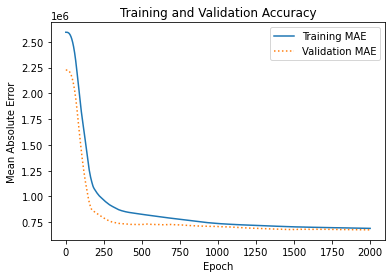

In [13]:
# Plot training accuracy and validation accuracy over time
%matplotlib inline
import matplotlib.pyplot as plt

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [14]:
# Compute the R2 score
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(x_test))

0.44161588861904233

In [15]:
# Score the model
scores = model.evaluate(x_test, y_test, verbose=0)

for i in range(0, len(scores)):
    print(model.metrics_names[i] + ': ' + str(scores[i]))

loss: 676340.625
mae: 676340.625


In [16]:
# Use the model to make a prediction
import numpy as np

bathrooms = 1
bedrooms = 1
finished_sqft = 1040
total_rooms = 4
usecode_Condominium = 1
usecode_SingleFamily = 0

model.predict(scaler.transform(np.array([[bathrooms, bedrooms, finished_sqft, total_rooms, usecode_Condominium, usecode_SingleFamily]])))

array([[970392.75]], dtype=float32)